In [4]:
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd

In [5]:
y = np.load(r"C:\Users\Thanasis\Documents\DSP\DSP20_LAB2\step_00.npz")#loading speech signal

print(y.files)
print(y['acc'].shape)
y_acc1=y['acc'][:,0]
y_acc2=y['acc'][:,1]
y_acc3=y['acc'][:,2]


['acc', 'gyr', 'hrm']
(11992, 3)


In [6]:
samples = np.linspace(0,11992,11992)
t_acc=samples*0.05
t_acc_power=t_acc*t_acc

Text(0.5, 1.0, 'acc')

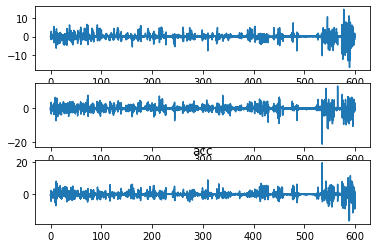

In [7]:
plt.subplot(3,1,1)
plt.plot(t_acc,y_acc1)
plt.subplot(3,1,2)
plt.plot(t_acc,y_acc2)
plt.subplot(3,1,3)
plt.plot(t_acc,y_acc3)
plt.title('acc')

In [8]:
y_gyr1=y['gyr'][:,0]
y_gyr2=y['gyr'][:,1]
y_gyr3=y['gyr'][:,2]
print(y['gyr'].shape)

(11992, 3)


In [9]:
samples = np.linspace(0,11992,11992)
t_gyr=samples*0.05
t_gyr_power=t_gyr*t_gyr

Text(0.5, 1.0, 'gyr')

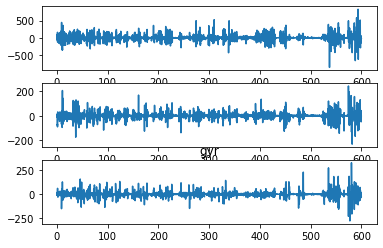

In [10]:
plt.subplot(3,1,1)
plt.plot(t_gyr,y_gyr1)
plt.subplot(3,1,2)
plt.plot(t_gyr,y_gyr2)
plt.subplot(3,1,3)
plt.plot(t_gyr,y_gyr3)
plt.title('gyr')

In [11]:
print(y['hrm'].shape)
y_hrm=y['hrm']

(2998,)


In [12]:
samples_hrm = np.linspace(0,2998,2998)
t_hrm=samples_hrm*0.2
t_hrm_power=t_hrm*t_hrm

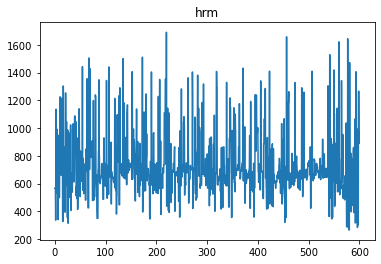

In [13]:
plt.title('hrm')
plt.plot(t_hrm,y_hrm)




In [14]:
def short_time_energy(x, window, window_length):
    if isinstance(window, str):
        window = sp.signal.get_window(window, window_length)#uses scipy to make the window 
    
    return sp.signal.convolve(x**2, window, mode="same")

In [15]:
win_len_acc=20*20
e_acc1 = short_time_energy(y_acc1, sp.signal.get_window("hamming", win_len_acc),win_len_acc)

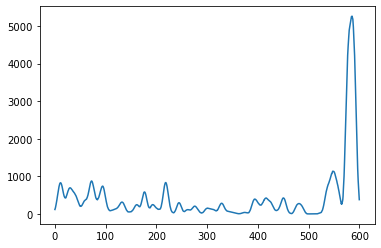

In [16]:
plt.plot(t_acc,e_acc1)

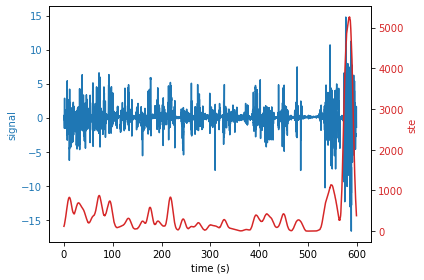

In [17]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('signal', color=color)
ax1.plot(t_acc, y_acc1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('ste', color=color)  # we already handled the x-label with ax1
ax2.plot(t_acc, e_acc1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [18]:
win_len_gyr=20*20
e_gyr1 = short_time_energy(y_gyr1, sp.signal.get_window("hamming", win_len_gyr),win_len_gyr)

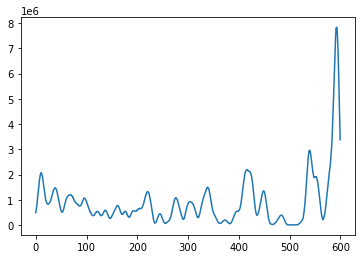

In [19]:
plt.plot(t_gyr,e_gyr1)

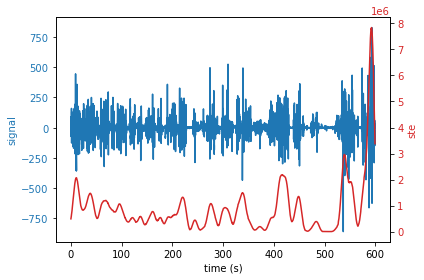

In [20]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('signal', color=color)
ax1.plot(t_gyr, y_gyr1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('ste', color=color)  # we already handled the x-label with ax1
ax2.plot(t_gyr, e_gyr1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [21]:
win_len_hrm=20*5
e_hrm = short_time_energy(y_hrm, sp.signal.get_window("hamming", win_len_hrm),win_len_hrm)

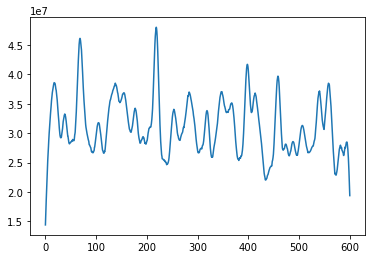

In [22]:
plt.plot(t_hrm,e_hrm)

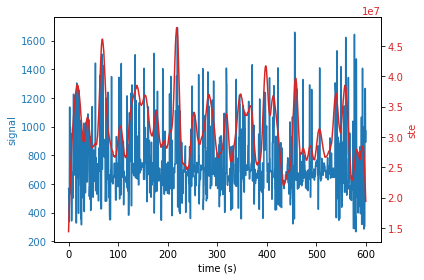

In [23]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('signal', color=color)
ax1.plot(t_hrm, y_hrm, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('ste', color=color)  # we already handled the x-label with ax1
ax2.plot(t_hrm, e_hrm, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [24]:
win_len_stft_acc=20*20
S_acc1=librosa.stft(y_acc1,n_fft=1024,hop_length=200,win_length=400)#stft window length 40 samples overlappng 20 samples 50%
print(np.shape(S_acc1))

(513, 60)


Text(0, 0.5, 'frequency')

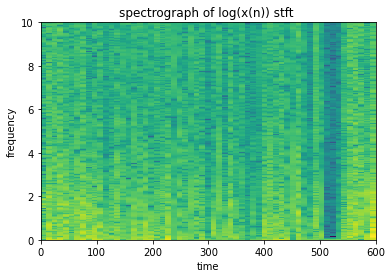

In [25]:
t_acc_stft = np.linspace(0,600,60)
f_acc_stft= np.linspace(0,10,513)
plt.pcolormesh(t_acc_stft,f_acc_stft,np.log(np.abs(S_acc1)))
plt.title('spectrograph of log(x(n)) stft ')
plt.xlabel('time')
plt.ylabel('frequency')

In [98]:
win_len_stft_gyr=20*20
S_gyr1=librosa.stft(y_gyr1,n_fft=1024,hop_length=200,win_length=400)#stft window length 40 samples overlappng 20 samples 50%
print(np.shape(S_gyr1))

(513, 60)


Text(0, 0.5, 'frequency')

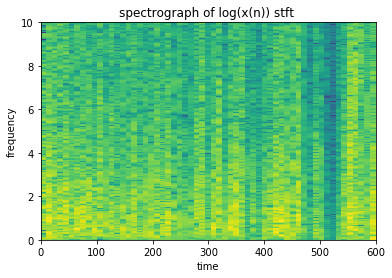

In [99]:
t_gyr_stft = np.linspace(0,600,60)
f_gyr_stft= np.linspace(0,10,513)
plt.pcolormesh(t_gyr_stft,f_gyr_stft,np.log(np.abs(S_gyr1)))
plt.title('spectrograph of log(x(n)) stft ')
plt.xlabel('time')
plt.ylabel('frequency')

In [103]:
win_len_stft_hrm=20*5
S_hrm=librosa.stft(y_hrm,n_fft=1024,hop_length=50,win_length=100)#stft window length 40 samples overlappng 20 samples 50%
print(np.shape(S_hrm))

(513, 60)


Text(0, 0.5, 'frequency')

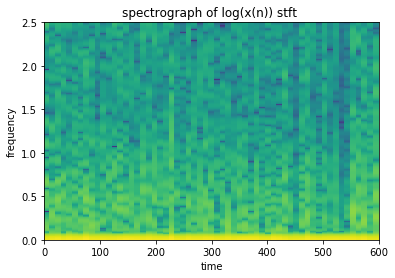

In [104]:
t_hrm_stft = np.linspace(0,600,60)
f_hrm_stft= np.linspace(0,2.5,513)
plt.pcolormesh(t_hrm_stft,f_hrm_stft,np.log(np.abs(S_hrm)))
plt.title('spectrograph of log(x(n)) stft ')
plt.xlabel('time')
plt.ylabel('frequency')

In [28]:
y_sl03 = np.load(r"C:\Users\Thanasis\Documents\DSP\DSP20_LAB2\sleep_03.npz")#loading speech signal

print(y_sl03.files)
print(y_sl03['acc'].shape)
y_sl03_acc1=y_sl03['acc'][:,0]
y_sl03_acc2=y_sl03['acc'][:,1]
y_sl03_acc3=y_sl03['acc'][:,2]
y_sl03_gyr1=y_sl03['gyr'][:,0]
y_sl03_gyr2=y_sl03['gyr'][:,1]
y_sl03_gyr3=y_sl03['gyr'][:,2]
y_sl03_hrm=y_sl03['hrm']

['acc', 'gyr', 'hrm']
(11992, 3)


In [32]:
e_sl03_acc1_val=np.ones(4)
e_sl03_acc2_val=np.ones(4)
e_sl03_acc3_val=np.ones(4)
e_sl03_gyr1_val=np.ones(4)
e_sl03_gyr2_val=np.ones(4)
e_sl03_gyr3_val=np.ones(4)
e_sl03_hrm_val=np.ones(4)

e_sl03_acc1 = short_time_energy(y_sl03_acc1, sp.signal.get_window("hamming", win_len_acc),win_len_acc)
e_sl03_acc2 = short_time_energy(y_sl03_acc2, sp.signal.get_window("hamming", win_len_acc),win_len_acc)
e_sl03_acc3 = short_time_energy(y_sl03_acc3, sp.signal.get_window("hamming", win_len_acc),win_len_acc)
e_sl03_gyr1 = short_time_energy(y_sl03_gyr1, sp.signal.get_window("hamming", win_len_gyr),win_len_gyr)
e_sl03_gyr2 = short_time_energy(y_sl03_gyr2, sp.signal.get_window("hamming", win_len_gyr),win_len_gyr)
e_sl03_gyr3 = short_time_energy(y_sl03_gyr3, sp.signal.get_window("hamming", win_len_gyr),win_len_gyr)
e_sl03_hrm = short_time_energy(y_sl03_hrm, sp.signal.get_window("hamming", win_len_hrm),win_len_hrm)

In [33]:
def calculate_values(ste,values):
    values[0]=np.mean(ste)
    values[1]=np.min(ste)
    values[2]=np.max(ste)
    values[3]=np.std(ste)
       
    

In [34]:
calculate_values(e_sl03_acc1,e_sl03_acc1_val)
calculate_values(e_sl03_acc2,e_sl03_acc2_val)
calculate_values(e_sl03_acc3,e_sl03_acc3_val)
calculate_values(e_sl03_gyr1,e_sl03_gyr1_val)
calculate_values(e_sl03_gyr2,e_sl03_gyr2_val)
calculate_values(e_sl03_gyr3,e_sl03_gyr3_val)
calculate_values(e_sl03_hrm,e_sl03_hrm_val)

In [35]:
all_values=np.ones((7,4))
all_values[0,0:4]= e_sl03_acc1_val
all_values[1,0:4]= e_sl03_acc2_val
all_values[2,0:4]= e_sl03_acc3_val
all_values[3,0:4]= e_sl03_gyr1_val
all_values[4,0:4]= e_sl03_gyr2_val
all_values[5,0:4]= e_sl03_gyr3_val
all_values[6,0:4]= e_sl03_hrm_val
print(all_values)

[[3.89655970e+00 4.88882668e-01 4.75844339e+01 5.91843377e+00]
 [1.27881135e+00 1.60723014e-01 1.43963995e+01 2.45852739e+00]
 [4.06065065e+00 1.39867270e-01 7.23764788e+01 8.21288961e+00]
 [1.39068625e+03 3.67605343e+00 2.29903330e+04 3.66679025e+03]
 [1.15231022e+02 3.60265659e+00 1.42924935e+03 2.61142734e+02]
 [1.32745052e+02 1.78271609e+00 1.97555525e+03 3.48729885e+02]
 [5.60650906e+07 2.59824510e+07 7.35470404e+07 5.69577956e+06]]


In [36]:
y_st03 = np.load(r"C:\Users\Thanasis\Documents\DSP\DSP20_LAB2\step_03.npz")#loading speech signal

print(y_st03.files)
print(y_st03['acc'].shape)
y_st03_acc1=y_st03['acc'][:,0]
y_st03_acc2=y_st03['acc'][:,1]
y_st03_acc3=y_st03['acc'][:,2]
y_st03_gyr1=y_st03['gyr'][:,0]
y_st03_gyr2=y_st03['gyr'][:,1]
y_st03_gyr3=y_st03['gyr'][:,2]
y_st03_hrm=y_st03['hrm']

['acc', 'gyr', 'hrm']
(11992, 3)


In [37]:
e_st03_acc1_val=np.ones(4)
e_st03_acc2_val=np.ones(4)
e_st03_acc3_val=np.ones(4)
e_st03_gyr1_val=np.ones(4)
e_st03_gyr2_val=np.ones(4)
e_st03_gyr3_val=np.ones(4)
e_st03_hrm_val=np.ones(4)

e_st03_acc1 = short_time_energy(y_st03_acc1, sp.signal.get_window("hamming", win_len_acc),win_len_acc)
e_st03_acc2 = short_time_energy(y_st03_acc2, sp.signal.get_window("hamming", win_len_acc),win_len_acc)
e_st03_acc3 = short_time_energy(y_st03_acc3, sp.signal.get_window("hamming", win_len_acc),win_len_acc)
e_st03_gyr1 = short_time_energy(y_st03_gyr1, sp.signal.get_window("hamming", win_len_gyr),win_len_gyr)
e_st03_gyr2 = short_time_energy(y_st03_gyr2, sp.signal.get_window("hamming", win_len_gyr),win_len_gyr)
e_st03_gyr3 = short_time_energy(y_st03_gyr3, sp.signal.get_window("hamming", win_len_gyr),win_len_gyr)
e_st03_hrm = short_time_energy(y_st03_hrm, sp.signal.get_window("hamming", win_len_hrm),win_len_hrm)

In [38]:
calculate_values(e_st03_acc1,e_st03_acc1_val)
calculate_values(e_st03_acc2,e_st03_acc2_val)
calculate_values(e_st03_acc3,e_st03_acc3_val)
calculate_values(e_st03_gyr1,e_st03_gyr1_val)
calculate_values(e_st03_gyr2,e_st03_gyr2_val)
calculate_values(e_st03_gyr3,e_st03_gyr3_val)
calculate_values(e_st03_hrm,e_st03_hrm_val)

In [39]:
all_values_st03=np.ones((7,4))
all_values_st03[0,0:4]= e_st03_acc1_val
all_values_st03[1,0:4]= e_st03_acc2_val
all_values_st03[2,0:4]= e_st03_acc3_val
all_values_st03[3,0:4]= e_st03_gyr1_val
all_values_st03[4,0:4]= e_st03_gyr2_val
all_values_st03[5,0:4]= e_st03_gyr3_val
all_values_st03[6,0:4]= e_st03_hrm_val
print(all_values_st03)

[[1.12929316e+03 6.69144955e+01 6.09713992e+03 9.74371316e+02]
 [7.71456072e+02 1.29137945e+02 2.92008062e+03 5.75153082e+02]
 [6.38337880e+02 3.53930585e+00 3.22882375e+03 5.42940851e+02]
 [1.10772581e+06 6.45293878e+03 4.20440541e+06 8.84631915e+05]
 [2.07668886e+05 3.46181223e+03 1.11771253e+06 1.81270080e+05]
 [2.26901246e+05 8.48361886e+02 1.23154319e+06 2.55810963e+05]
 [3.21798539e+07 1.43789334e+07 5.88707101e+07 7.92256163e+06]]
